In [10]:
!pip install opencv-python

In [15]:
import cv2 as cv
import matplotlib.pyplot as plt

(-0.5, 465.5, 539.5, -0.5)

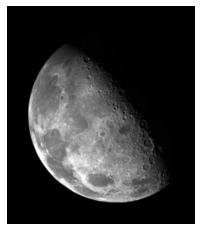

In [16]:
img=cv.imread("moon.tif")
plt.imshow(img)
plt.axis("OFF")

Sobel and Laplace

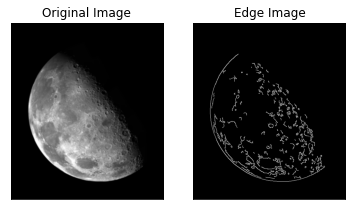

In [17]:
img = cv.imread('moon.tif')
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges, cmap="gray")
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

Canny

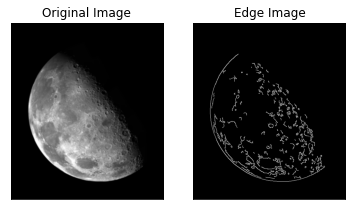

In [18]:
img = cv.imread('moon.tif')
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges, cmap="gray")
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

Robert Edge detection

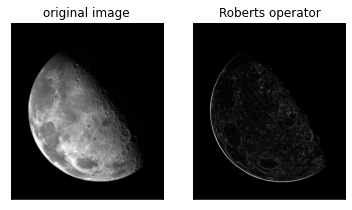

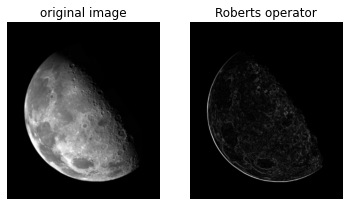

In [21]:
import cv2
import numpy as np
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #  into RGB for easy display
 
 # Grayscale processing image
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
 #Roberts 
kernelx = np.array([[-1, 0], [0, 1]], dtype=int)
kernely = np.array([[0, -1], [1, 0]], dtype=int)
x = cv2.filter2D(grayImage, cv2.CV_16S, kernelx)
y = cv2.filter2D(grayImage, cv2.CV_16S, kernely)
 # uint8
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Roberts = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
 

titles = [u'original image', u'Roberts operator']
images = [img_RGB, Roberts]
for i in range(2):
    plt.subplot(1, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


plt.subplot(121), plt.imshow(img_RGB), plt.title('original image'), plt.axis('off') #axis off
plt.subplot(122), plt.imshow(Roberts, cmap=plt.cm.gray), plt.title('Roberts operator'), plt.axis('off')
plt.show()
 

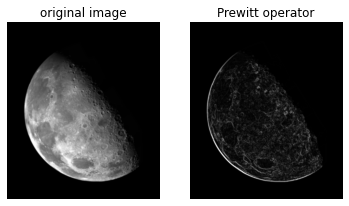

In [22]:
 # Prewitt operator
kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=int)
x = cv2.filter2D(grayImage, cv2.CV_16S, kernelx)
y = cv2.filter2D(grayImage, cv2.CV_16S, kernely)
 # uint8
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Prewitt = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

# titles = [u'original image', u'Prewitt operator']
# images = [img_RGB, Prewitt]
# for i in range(2):
#     plt.subplot(1, 2, i + 1), plt.imshow(images[i], 'gray')
#     plt.title(titles[i])
#     plt.xticks([]), plt.yticks([])
# plt.show()
 
 
  
plt.subplot(121), plt.imshow(img_RGB), plt.title('original image'), plt.axis('off') #axis off
plt.subplot(122), plt.imshow(Prewitt, cmap=plt.cm.gray), plt.title('Prewitt operator'), plt.axis('off')
plt.show()

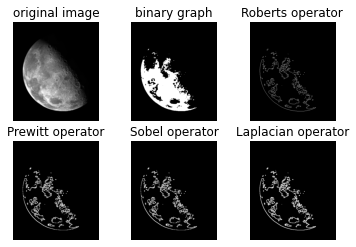

In [23]:
 #Gaussian filter
gaussianBlur = cv2.GaussianBlur(grayImage, (3,3), 0)
 
 #threshold processing
ret, binary = cv2.threshold(gaussianBlur, 127, 255, cv2.THRESH_BINARY)
 
 #Roberts 
kernelx = np.array([[-1,0],[0,1]], dtype=int)
kernely = np.array([[0,-1],[1,0]], dtype=int)
x = cv2.filter2D(binary, cv2.CV_16S, kernelx)
y = cv2.filter2D(binary, cv2.CV_16S, kernely)
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Roberts = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
 
 #Prewitt operator
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]], dtype=int)
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]], dtype=int)
x = cv2.filter2D(binary, cv2.CV_16S, kernelx)
y = cv2.filter2D(binary, cv2.CV_16S, kernely)
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Prewitt = cv2.addWeighted(absX,0.5,absY,0.5,0)
 
 #Sobel operator
x = cv2.Sobel(binary, cv2.CV_16S, 1, 0)
y = cv2.Sobel(binary, cv2.CV_16S, 0, 1)
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
 
 #Laplacian operator
dst = cv2.Laplacian(binary, cv2.CV_16S, ksize = 3)
Laplacian = cv2.convertScaleAbs(dst)
 
 # # 
# titles = ['Source Image', 'Binary Image', 'Roberts Image',
#           'Prewitt Image','Sobel Image', 'Laplacian Image']
# images = [lenna_img, binary, Roberts, Prewitt, Sobel, Laplacian]
# for i in np.arange(6):
#    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
#    plt.title(titles[i])
#    plt.xticks([]),plt.yticks([])
# plt.show()
 
plt.subplot(231), plt.imshow(img_RGB), plt.title('original image'), plt.axis('off') #axis off
plt.subplot(232), plt.imshow(binary, cmap=plt.cm.gray ), plt.title('binary graph'), plt.axis('off')
plt.subplot(233), plt.imshow(Roberts, cmap=plt.cm.gray), plt.title('Roberts operator'), plt.axis('off')
plt.subplot(234), plt.imshow(Prewitt, cmap=plt.cm.gray), plt.title('Prewitt operator'), plt.axis('off')
plt.subplot(235), plt.imshow(Sobel, cmap=plt.cm.gray), plt.title('Sobel operator'), plt.axis('off')
plt.subplot(236), plt.imshow(Laplacian, cmap=plt.cm.gray), plt.title('Laplacian operator'), plt.axis('off')
 
plt.show()